# **ANALYTICS FOR UNSTRUCTURED DATA: GROUP ASSIGNMENT #1**

Group Members: Ohyoon Kwon(ok2364), Samuel Oh(io3279), Ankita Kundra(ak44675), Oluwaseun Ibitoye(oli63), Ambikha Maharaj(am84333)

#### **1. Which forum you chose (provide URL)**

#### We chose the 5000 oldest posts starting from March 2002, from the Edmunds.com Entry Level Luxury discussion forum : https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans

   ### **Task 1 & 2: Web Scraping:**

In [1]:
#Selenium is an open-source tool that automates web browsers.
!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver 
#WebDriver is a browser automation framework that works with open source APIs. 
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

     |████████████████████████████████| 904 kB 3.5 MB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,326 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:13 http://ppa.la

In [2]:
wd = webdriver.Chrome('chromedriver',options=chrome_options)
wd.get('https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans')

In [3]:
import pandas as pd
comments = pd.DataFrame(columns = ['Date', 'comments']) 

# each page has 50 comments, so looped through 100 pages for 5000 comments
for p in range(1, 101, 1):
    page_url = "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p" + str(p)
    wd.get(page_url)

    ids = wd.find_elements_by_xpath("//*[contains(@id,'Comment_')]")

    comment_ids = []
    for i in ids:
        comment_ids.append(i.get_attribute('id'))

    for x in comment_ids:
        user_date = wd.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[2]/span[1]/a/time')[0]
        date = user_date.get_attribute('title')

        user_message = wd.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[3]/div/div[1]')[0]
        comment = user_message.text

        comments.loc[len(comments)] = [date, comment]
  
print(comments.head())
print(comments.shape[0])

                     Date                                           comments
0  March 24, 2002 10:54PM  I personally think that with a few tweaks the ...
1  March 25, 2002 12:06AM  I am debating a new purchase and these two are...
2  March 25, 2002 10:02AM  Great handling, RWD, excellent engine and the ...
3   March 25, 2002 4:04PM  And no manual tranny. That may not matter to y...
4   March 25, 2002 5:44PM  One beauty of BMW 3 Series is that there are s...
5000


In [4]:
comments.to_csv("results.csv")
!ls
from google.colab import files
files.download("results.csv")

results.csv  sample_data


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Task A: Does the data support Zipf's Law?**

In [5]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
%pylab inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Populating the interactive namespace from numpy and matplotlib


In [6]:
import io
comments_df = pd.read_csv('results.csv')
comments_df.drop(columns = 'Unnamed: 0', inplace = True)
comments_df.head()

,Date,comments
0,"March 24, 2002 10:54PM",I personally think that with a few tweaks the ...
1,"March 25, 2002 12:06AM",I am debating a new purchase and these two are...
2,"March 25, 2002 10:02AM","Great handling, RWD, excellent engine and the ..."
3,"March 25, 2002 4:04PM",And no manual tranny. That may not matter to y...
4,"March 25, 2002 5:44PM",One beauty of BMW 3 Series is that there are s...


In [7]:
#Remove punctuation and convert to lower case
comments_df['comments'] = comments_df['comments'].astype(str)
comments_df['comments'] = comments_df['comments'].apply(lambda x :x.translate(str.maketrans('', '', string.punctuation)))
comments_df['comments'] = comments_df['comments'].apply(lambda x :x.lower())

In [8]:
#stitch all the words together 
def stitch_words(comment_col):
    corpus = ""
    for words in comment_col:
        corpus += words
    return corpus
corpus = stitch_words(comments_df['comments']).lower()

#tokenize the words for counts 
tokens = nltk.word_tokenize(corpus)

#count the word frequencies 
from collections import Counter
word_frequencies =Counter(tokens)

#find the top 100 most common
common_100= word_frequencies.most_common(100)

In [9]:
#create a df to check zipf's law
zipf_df=pd.DataFrame(common_100, columns =['words','freq'])

#insert rank column 
zipf_df['rank'] = zipf_df.index + 1

In [10]:
#zipf's law
#this is predicting the frequency 
max_freq = common_100[0][1]
counter = 1
zipf = []
while len(zipf) < 100:
    zipf.append(max_freq/counter)
    counter += 1

Text(0, 0.5, 'Frequency')

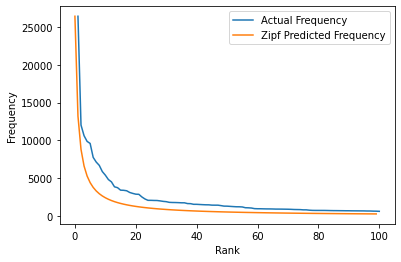

In [11]:
#Rank vs frequency & zipf's law 
plot(zipf_df['rank'], zipf_df['freq'], label = 'Actual Frequency')
plot(zipf, label = 'Zipf Predicted Frequency') 
legend(loc='best')
xlabel('Rank')
ylabel('Frequency')

Text(0, 0.5, 'Log of Frequency')

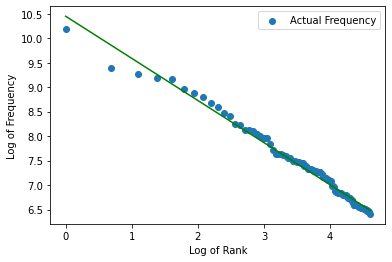

In [12]:
#Log rank vs log frequency & regression fitted line
import numpy as np

scatter(np.log(zipf_df['rank']), np.log(zipf_df['freq']), label = 'Actual Frequency')
m,b = np.polyfit(np.log(zipf_df['rank']),np.log(zipf_df['freq']), 1) 
plot(np.log(zipf_df['rank']), m*np.log(zipf_df['rank'])+b, color='green')
#plt.xlim(0,10)
legend(loc='best')
xlabel('Log of Rank')
ylabel('Log of Frequency')

As we can see above, the actual frequency-rank plot is close to a straight line. Also, the log-log plot of Zipf's law gives us a straight line. Hence, our data supports the Zipf's Law.

### **Task B: Find the top 10 brands from frequency counts?**

In [13]:
from google.colab import files
uploaded = files.upload()

Saving car_models_and_brands.csv to car_models_and_brands.csv


In [14]:
brand_df = pd.read_csv('car_models_and_brands.csv')
brand_df.columns = ['brand','model']
brand_df.head()

,brand,model
0,acura,integra
1,acura,legend
2,acura,vigor
3,acura,rlx
4,acura,ilx


In [15]:
# Clean the car_models_and_brands.csv file
brand_df['brand'].replace('mercedes-benz', 'mercedes', inplace = True)
brand_df['brand'].replace('mercedes benz', 'mercedes', inplace = True)
brand_df['brand'].replace('hyundai,', 'hyundai', inplace = True)
brand_df['brand'].replace('hyundai.', 'hyundai', inplace = True)
brand_df['brand'].replace('kia,', 'kia', inplace = True)
brand_df['brand'].replace('kia.', 'kia', inplace = True)
brand_df['brand'].replace('nissan.', 'nissan', inplace = True)
brand_df['brand'].replace('toyata', 'toyota', inplace = True)
brand_df['brand'].replace('volkwagen', 'volkswagen', inplace = True)

# dropping rows
brand_df = brand_df[brand_df.brand != 'car']
brand_df = brand_df[brand_df.brand != 'problem']
brand_df = brand_df[brand_df.brand != 'sedan']

In [16]:
#Replace models by brands
def model_to_brand(s):
    for i in brand_df.index.values:
        s = s.replace(brand_df["model"][i].lower(),brand_df["brand"][i].lower())
    return s
comments_df['comments_model_replace'] = comments_df['comments'].apply(model_to_brand)

In [17]:
def split_sentence(lst):
    return (lst.split())

stop_words = stopwords.words('english') 
comments_df['comments_model_replace_words'] = comments_df['comments_model_replace'].apply(split_sentence)#.apply(set)

def remove_stopwords(s):
    return [x for x in s if not x in stop_words] 
    
comments_df['comments_model_replace_words'] =  comments_df['comments_model_replace_words'].apply(remove_stopwords)
comments_df

,Date,comments,comments_model_replace,comments_model_replace_words
0,"March 24, 2002 10:54PM",i personally think that with a few tweaks the ...,i personally think that with a few tweaks the ...,"[personally, think, tweaks, c320, could, also,..."
1,"March 25, 2002 12:06AM",i am debating a new purchase and these two are...,i am debating a new purchase and these two are...,"[debating, new, purchase, two, top, ltoyota, p..."
2,"March 25, 2002 10:02AM",great handling rwd excellent engine and the be...,great handling rwd excellent engine and the be...,"[great, handling, rwd, excellent, engine, best..."
3,"March 25, 2002 4:04PM",and no manual tranny that may not matter to yo...,and no manual tranny that may not matter to yo...,"[manual, tranny, may, matter, certainly, matte..."
4,"March 25, 2002 5:44PM",one beauty of bmw 3 series is that there are s...,one beauty of bmw 3 series is that there are s...,"[one, beauty, bmw, 3, series, many, models, ch..."
...,...,...,...,...
4995,"January 23, 2006 9:51PM",i agree with blueguydotcom the is350 is one fa...,i agree with blueguydotcom the is350 is one fa...,"[agree, blueguydotcom, is350, one, fast, ride,..."
4996,"January 23, 2006 11:29PM",dont have any interest in aftermarket tuners t...,dont have any interest in aftermarket tuners t...,"[dont, interest, aftermarket, tuners, 35, 30tt..."
4997,"January 24, 2006 7:39PM",dont have any interest in aftermarket tuners\n...,dont have any interest in aftermarket tuners\n...,"[dont, interest, aftermarket, tuners, consider..."
4998,"January 24, 2006 7:42PM",amg i have no use forits mb afterall as for m ...,amg i have no use forits mb afterall as for m ...,"[amg, use, forits, mb, afterall, actual, divis..."


In [18]:
#Creating a combined list of all words
all_words = []
for i in range(len(comments_df)):
    all_words+=comments_df['comments_model_replace_words'][i]
from nltk import FreqDist
word_freq = nltk.FreqDist(all_words)

In [19]:
#Creating a list of all brand names
brand_names = brand_df['brand'].unique()
brand_names

array(['acura', 'audi', 'bmw', 'buick', 'cadillac', 'chevrolet',
       'chrysler', 'dodge', 'ford', 'honda', 'hyndai kia', 'hyundai',
       'infiniti', 'kia', 'lincoln', 'mazda', 'mercedes', 'mercury',
       'mitsubishi', 'nissan', 'pontiac', 'saturn', 'seat', 'subaru',
       'suzuki', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [20]:
#Filtering counts for brands
brand_counts = []
for key,item in word_freq.most_common():
    if key in brand_names:
        temp = (key,item)
        brand_counts.append(temp)

In [21]:
brands_sorted_df = pd.DataFrame(brand_counts, columns = ['Brand','Freq'])
#brands_sorted_df.drop([0, 2, 9, 10], axis = 0, inplace =True)


#### **2. Which 10 brands you chose – provide the frequency table**

In [22]:
brands_sorted_df[:10]

,Brand,Freq
0,bmw,2581
1,acura,875
2,audi,844
3,honda,665
4,infiniti,550
5,nissan,501
6,toyota,438
7,seat,408
8,subaru,373
9,volkswagen,309


### **Task C: Calculate lift ratios for associations between the top-10 brands identified in Task B**

In [23]:
top_brands = list(brands_sorted_df['Brand'][:10])
top_brands

['bmw',
 'acura',
 'audi',
 'honda',
 'infiniti',
 'nissan',
 'toyota',
 'seat',
 'subaru',
 'volkswagen']

In [24]:
lifts_df = pd.DataFrame(columns = ['A', 'B', 'Lift'])
for i in range(10):
    for j in range(10):
        if j != i:
            top_brands[i]
            top_brands[j]
            na = 0
            nb = 0
            nab = 0
            for k in comments_df['comments_model_replace_words']:
                if top_brands[i] in k:
                    na += 1
                    if top_brands[j] in k:
                        nab += 1
                if top_brands[j] in k:
                    nb += 1
            lifts = ((nab * 5000) / (na * nb))
            lifts_df.loc[len(lifts_df)] = [top_brands[i], top_brands[j], lifts]
            
#lifts_df = lifts_df.append({'A': 'volvo', 'B': 'bmw', 'Lift': np.nan},ignore_index=True)
lift_matrix = lifts_df.pivot(index='A', columns='B', values='Lift')
lift_matrix

#a = pd.crosstab(lifts_df['A'], lifts_df['B'])
#a

B,acura,audi,bmw,honda,infiniti,nissan,seat,subaru,toyota,volkswagen
A,,,,,,,,,,
acura,NaN,2.223950,1.528881,2.560164,3.056862,2.262470,1.411114,2.153984,1.792115,1.781634
audi,2.223950,NaN,1.716063,1.382579,2.761044,1.561062,2.134522,1.795644,1.223943,4.650180
bmw,1.528881,1.716063,NaN,1.276937,2.028468,1.256938,1.533330,1.212623,1.448354,1.561768
honda,2.560164,1.382579,1.276937,NaN,1.402713,3.968038,1.475225,1.519996,3.903201,2.122793
infiniti,3.056862,2.761044,2.028468,1.402713,NaN,2.508998,1.742946,1.815405,1.116071,2.208212
nissan,2.262470,1.561062,1.256938,3.968038,2.508998,NaN,1.438774,1.517378,3.796868,2.817120
seat,1.411114,2.134522,1.533330,1.475225,1.742946,1.438774,NaN,1.324955,1.874766,2.532578
subaru,2.153984,1.795644,1.212623,1.519996,1.815405,1.517378,1.324955,NaN,1.373626,2.530364
toyota,1.792115,1.223943,1.448354,3.903201,1.116071,3.796868,1.874766,1.373626,NaN,2.134967


**Heat Map of the Association/Lift values between the Top 10 Brands**

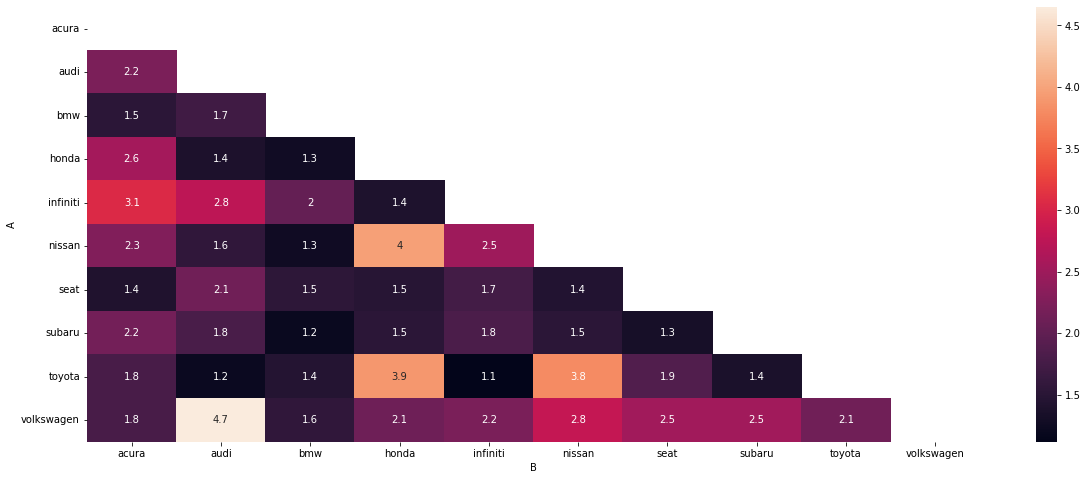

In [25]:
import seaborn as sns
plt.figure(figsize=(20,8))


sns.heatmap(lift_matrix.fillna(0),
            annot=True,mask=np.triu(lift_matrix))

### **Task D: Multi-Dimensional Scaling Map**

In [26]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

In [27]:
ds_matrix = lifts_df.pivot(index='A', columns='B', values='Lift').apply(lambda x: 1/x).fillna(0)
ds_matrix

B,acura,audi,bmw,honda,infiniti,nissan,seat,subaru,toyota,volkswagen
A,,,,,,,,,,
acura,0.000000,0.449650,0.654073,0.390600,0.327133,0.441995,0.708660,0.464256,0.558000,0.561282
audi,0.449650,0.000000,0.582729,0.723286,0.362182,0.640590,0.468489,0.556903,0.817031,0.215045
bmw,0.654073,0.582729,0.000000,0.783124,0.492983,0.795584,0.652175,0.824659,0.690439,0.640300
honda,0.390600,0.723286,0.783124,0.000000,0.712904,0.252014,0.677863,0.657896,0.256200,0.471077
infiniti,0.327133,0.362182,0.492983,0.712904,0.000000,0.398566,0.573741,0.550841,0.896000,0.452855
nissan,0.441995,0.640590,0.795584,0.252014,0.398566,0.000000,0.695036,0.659032,0.263375,0.354972
seat,0.708660,0.468489,0.652175,0.677863,0.573741,0.695036,0.000000,0.754743,0.533400,0.394855
subaru,0.464256,0.556903,0.824659,0.657896,0.550841,0.659032,0.754743,0.000000,0.728000,0.395200
toyota,0.558000,0.817031,0.690439,0.256200,0.896000,0.263375,0.533400,0.728000,0.000000,0.468391


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"
No handles with labels found to put in legend.


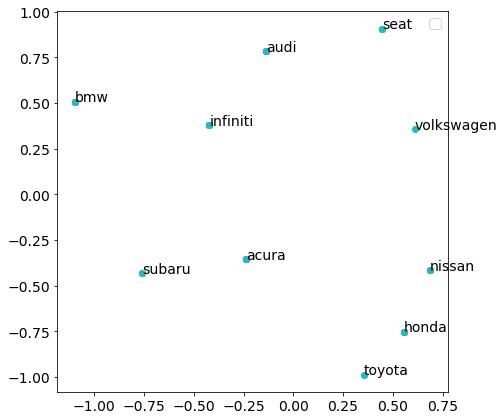

In [28]:
X = ds_matrix
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
mds = MDS(2, random_state=0)
X2 = mds.fit_transform(X_scaled)

x = []
y = []
colors = ['blue', 'orange', 'green', 'red', 'purple', 'magenta', 'black', 'cyan', 'pink', 'yellow']
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
for i in range(10):
    x.append(X2[i][0])
    y.append(X2[i][1])
    plt.scatter(x,y)
    plt.annotate(X.index[i], xy=(X2[i][0], X2[i][1]))

plt.legend()
plt.show()

### **Task E: Insights that can be offered to the client from analyses in Tasks C and D**

We can see from the Lift Matrix in Task C that there are high associations between: Toyota and Honda, Toyota and Nissan, Volkswagen and Audi, Honda and Nissan, Acura and Infiniti.

We can also see from the Lift Matrix in Task C that there are low associations between: Audi and Toyota, Infiniti and Toyota, Seat and Subaru, BMW and Toyota, Subaru and BMW.

From Task C, a noteworthy observation is that Audi has a high association with Volkswagen. However, our clients may not have considered Volkswagen to be as luxurious as Audi. This could suggest luxury car brand managers to not only consider other luxury brands as competitors, but to also consider a wider range of brands as competitors.

From both Tasks C and D, we can analyze that BMW has low associations with the other brands in the top 10 list, but has the highest frequency. This could mean that people in the forum make less comparisons against BMW. An insight that can be offered to the client here is that BMW has relatively less competition with the other brands in the top 10. However, since we are only looking at the top 10 brands, we could deduce that BMW's potential competitor might not be included in the top 10 list.

From the MDS plot in Task D, we can see that Nissan, Honda, and Toyota are close together, forming a cluster. We can offer to the client that there is a possibility of switching behaviour amongst the brands in the cluster. Not only this, the MDS plot shows a cluster with Subaru and Acura, and another cluster with Audi, Infiniti, and BMW. We can infer from the clusterings that Audi, Infiniti, and BMW may be considered to be relatively more luxurious compared to the other clusters.

### **Task F: Five most frequently mentioned attributes or features of cars in the discussions**

In [29]:
words =[]
for i in range(len(comments_df['comments_model_replace_words'] )):
          words = words + comments_df['comments_model_replace_words'][i]
words_frq = nltk.FreqDist(words)
words_frq.most_common(70)

[('car', 3812),
 ('bmw', 2581),
 ('cars', 2027),
 ('like', 1789),
 ('tl', 1780),
 ('one', 1546),
 ('would', 1427),
 ('dont', 1388),
 ('pontiac5', 1328),
 ('get', 1294),
 ('think', 1215),
 ('better', 979),
 ('drive', 967),
 ('im', 961),
 ('3', 937),
 ('performance', 927),
 ('new', 918),
 ('much', 914),
 ('acura', 875),
 ('even', 854),
 ('people', 849),
 ('audi', 844),
 ('good', 829),
 ('well', 770),
 ('really', 764),
 ('know', 741),
 ('driving', 739),
 ('best', 727),
 ('also', 724),
 ('want', 706),
 ('sedan', 703),
 ('luxury', 701),
 ('rwd', 678),
 ('honda', 665),
 ('say', 638),
 ('still', 630),
 ('330i', 618),
 ('engine', 615),
 ('time', 593),
 ('way', 577),
 ('series', 573),
 ('make', 566),
 ('fwd', 560),
 ('see', 555),
 ('thats', 551),
 ('price', 550),
 ('infiniti', 550),
 ('buy', 535),
 ('awd', 529),
 ('great', 524),
 ('go', 524),
 ('many', 511),
 ('handling', 509),
 ('interior', 504),
 ('test', 504),
 ('could', 502),
 ('power', 501),
 ('nissan', 501),
 ('g', 498),
 ('hp', 492),
 ('

**We manually picked top 5 features: performance, luxury, engine, price, handling.**

In [30]:
best_5features = np.array(['performance', 'luxury', 'engine', 'price', 'handling'])
best_5features

array(['performance', 'luxury', 'engine', 'price', 'handling'],
      dtype='<U11')

In [31]:
features_lift = pd.DataFrame(columns = ['Brand', 'Feature', 'Lift'])
for i in range(10):
    for j in range(5):
        top_brands[i]
        best_5features[j]
        na2 = 0
        nb2 = 0
        nab2 = 0
        for k in comments_df['comments_model_replace_words']:
            if top_brands[i] in k:
                na2 += 1
                if best_5features[j] in k:
                    nab2 += 1
            if best_5features[j] in k:
                nb2 += 1
        lifts2 = ((nab2 * 5000) / (na2 * nb2))
        features_lift.loc[len(features_lift)] = [top_brands[i], best_5features[j], lifts2]
features_lift = features_lift.pivot(index='Brand', columns='Feature', values='Lift')
features_lift

Feature,engine,handling,luxury,performance,price
Brand,,,,,
acura,1.604568,1.501248,1.993476,1.497968,1.640668
audi,1.821238,1.513909,1.732774,1.446516,2.177725
bmw,1.509558,1.689530,1.325309,1.499463,1.506318
honda,1.470508,1.502017,1.736705,1.512639,1.896626
infiniti,1.544331,1.329352,1.726358,1.583080,1.711659
nissan,1.661130,1.043642,1.642465,1.312747,1.208803
seat,2.105841,2.421981,2.256038,1.346241,1.802151
subaru,1.229875,1.006847,3.295160,1.753566,1.410708
toyota,1.771872,1.994515,2.389870,1.447387,1.676727


#### **5. Which 5 attributes you chose – provide the frequency table**

In [32]:
att_freq = pd.DataFrame(columns = ['Attribute', 'Frequency'])

for att in best_5features:
  if att in words_frq.keys():
    val = words_frq.get(att)
    att_freq.loc[len(att_freq)] = [att, val]

att_freq

,Attribute,Frequency
0,performance,927
1,luxury,701
2,engine,615
3,price,550
4,handling,509


### **Task G: Advice that can be given to the client from Task F?**

All advice here is assuming that all sentiments are positive.

Our client may have assumed Audi, BMW and Infiniti to have the highest associations with 'Luxury'. However, the brands that have high associations with 'Luxury' are Seat, Subaru, Toyota and Volkswagen. This could mean that these four brands are considered more as entry level luxury cars compared to Audi, BMW, and Infiniti. This reveals a possibility of a differentiation between lower-level and higher-level luxury cars since people might not comment a lot about higher-level luxury cars in a forum about entry-level luxury cars. People also might not talk about the luxurious aspect of a brand when commenting about Audi, BMW and Infiniti because 'Luxury' is given for these brands.

'Price' also has high associations with Audi and Volkswagen. From Task C, we have already seen that Audi and Volkswagen have a high association, which could mean that the two brands are compared often. Both brands having high lift values with 'Price' may reveal Audi's potential competitor to unexpectedly be Volkswagen. Thus, a piece of advice we could give for companies is to focus on providing good value for money.

On the other hand, while 'Performance' is the most frequently mentioned attribute in the forum, there is not a noteworthy brand with a high association with this attribute. This could mean that 'Performance' is evenly mentioned about among the brands and in the comments. We could advise companies to focus on having good performance of cars as a given.

Recommended Marketing Focuses ('Performance' is a given throughout):
- Seat - Durable, powerful and luxurious car (Good 'Handling' and 'Engine')
- Toyota - Comfortable luxurious car (Comfortable because good 'Handling')
- Subaru - Luxurious car
- Volkswagen - Affordable luxurious car
- Audi - Luxurious powerful car that has good value for money (Good 'Price' and 'Engine')
- Acura - Luxurious car
- Honda - Affordable car
- BMW - Might want to focus more on performance, power, and luxury. The slogan of BMW is "The ultimate driving machine", but people don't seem to talk a lot about the performance, power, and luxury of BMW.
- Nissan and Infiniti - These brands do not have strong associations with the top 5 attributes. It could mean that these brands specialize in another attribute that is below the top 5.

### **Task H: Most aspirational brand in the data in terms of people actually wanting to buy or own**

We created a list of phrases that might be linked to aspiration.

In [33]:
#These are the words/phrases we have associated with aspiration.
aspiration_list = ['hope to', 'want to', 'prefer', 'dream car', 'dream of', 'aspire', 'looking for','love to' ,
                  'desire', 'love','want']

In [34]:
#Replace models with brands for all comments
def model_to_brand(s):
    for i in brand_df.index.values:
        s = s.replace(brand_df["model"][i].lower(),brand_df["brand"][i].lower())
    return s
comments_df['comments_model_replace_stop_words'] = comments_df['comments'].apply(model_to_brand)

In [35]:
#Replace chosen aspirational phrases with the term 'aspiration' for all comments
def asp_words(x):
    for i in aspiration_list:
        x = x.replace(i,'aspiration')
    return x
comments_df['aspirational_words'] = comments_df['comments_model_replace_stop_words'].apply(asp_words)

In [36]:
comments_df

,Date,comments,comments_model_replace,comments_model_replace_words,comments_model_replace_stop_words,aspirational_words
0,"March 24, 2002 10:54PM",i personally think that with a few tweaks the ...,i personally think that with a few tweaks the ...,"[personally, think, tweaks, c320, could, also,...",i personally think that with a few tweaks the ...,i personally think that with a few tweaks the ...
1,"March 25, 2002 12:06AM",i am debating a new purchase and these two are...,i am debating a new purchase and these two are...,"[debating, new, purchase, two, top, ltoyota, p...",i am debating a new purchase and these two are...,i am debating a new purchase and these two are...
2,"March 25, 2002 10:02AM",great handling rwd excellent engine and the be...,great handling rwd excellent engine and the be...,"[great, handling, rwd, excellent, engine, best...",great handling rwd excellent engine and the be...,great handling rwd excellent engine and the be...
3,"March 25, 2002 4:04PM",and no manual tranny that may not matter to yo...,and no manual tranny that may not matter to yo...,"[manual, tranny, may, matter, certainly, matte...",and no manual tranny that may not matter to yo...,and no manual tranny that may not matter to yo...
4,"March 25, 2002 5:44PM",one beauty of bmw 3 series is that there are s...,one beauty of bmw 3 series is that there are s...,"[one, beauty, bmw, 3, series, many, models, ch...",one beauty of bmw 3 series is that there are s...,one beauty of bmw 3 series is that there are s...
...,...,...,...,...,...,...
4995,"January 23, 2006 9:51PM",i agree with blueguydotcom the is350 is one fa...,i agree with blueguydotcom the is350 is one fa...,"[agree, blueguydotcom, is350, one, fast, ride,...",i agree with blueguydotcom the is350 is one fa...,i agree with blueguydotcom the is350 is one fa...
4996,"January 23, 2006 11:29PM",dont have any interest in aftermarket tuners t...,dont have any interest in aftermarket tuners t...,"[dont, interest, aftermarket, tuners, 35, 30tt...",dont have any interest in aftermarket tuners t...,dont have any interest in aftermarket tuners t...
4997,"January 24, 2006 7:39PM",dont have any interest in aftermarket tuners\n...,dont have any interest in aftermarket tuners\n...,"[dont, interest, aftermarket, tuners, consider...",dont have any interest in aftermarket tuners\n...,dont have any interest in aftermarket tuners\n...
4998,"January 24, 2006 7:42PM",amg i have no use forits mb afterall as for m ...,amg i have no use forits mb afterall as for m ...,"[amg, use, forits, mb, afterall, actual, divis...",amg i have no use forits mb afterall as for m ...,amg i have no use forits mb afterall as for m ...


In [37]:
#Creating a raw structure of lift table
lift_df = pd.DataFrame(columns = ['brand', 'brandcount', 'asp_count', 'lift', 'percent_aspirational'])
lift_df['brand'] = brand_df['brand'].unique()

In [38]:
#Finding the total comments with 'aspiration' in it
overall_asp_count = 0
for comment in comments_df['aspirational_words']:
    if 'aspiration' in comment:
        overall_asp_count += 1
n = len(comments_df)
n

5000

In [39]:
index = 0
for brand in lift_df['brand']:
    brandcount = 0
    asp_count = 0
    for comment in comments_df['aspirational_words']:
        if brand in comment:
            brandcount += 1
        if 'aspiration' in comment and brand in comment:
            asp_count += 1
        
    lift_df['brandcount'][index] = brandcount
    lift_df['asp_count'][index] = asp_count
    index += 1
  

In [40]:
#Finding the lift table for brands
lift_df['percent_aspirational'] = lift_df['asp_count']/lift_df['brandcount']
lift_df['lift'] = (n*lift_df['asp_count'])/(lift_df['brandcount']*overall_asp_count)
lift_df.sort_values(by = 'lift', ascending = False)[:10]

,brand,brandcount,asp_count,lift,percent_aspirational
10,hyndai kia,2,1,2.29148,0.5
18,mitsubishi,23,11,2.19185,0.478261
22,seat,289,125,1.98225,0.432526
3,buick,37,16,1.98182,0.432432
24,suzuki,24,10,1.90956,0.416667
15,mazda,109,44,1.85,0.40367
6,chrysler,81,32,1.81055,0.395062
26,volkswagen,218,86,1.80795,0.394495
14,lincoln,64,25,1.79022,0.390625
8,ford,255,98,1.76129,0.384314



To assess which brands were the most 'aspirational', we decided to create a list of aspirational words (want to, hope to, desire, etc.) and replace those words with the word 'aspiration', similar to what we did with the brands and models. From there, we calculated how many times the brand appears in post, and then how many times the word 'aspirational' appears with that brand. From there, we calculated lifts, which can be found in the table above.

When we take the list of all brands, we find that Hyndai Kia is the most aspirational brand, followed by Mitsubishi. But Hyndai Kia has been mentioned only 2 times amongst all the 5000 comments. Thus, it might be better to calculate association between aspiration and brands that have enough comments about them.

Hence, we next find the most aspirational brand amongst the top 10 brands.

**Most aspirational brand among the top 10**

In [41]:
lift_df = pd.DataFrame(columns = ['brand', 'brandcount', 'asp_count', 'lift', 'percent_aspirational'])
lift_df['brand'] = top_brands

overall_asp_count = 0
for comment in comments_df['aspirational_words']:
    if 'aspiration' in comment:
        overall_asp_count += 1
n = len(comments_df)

index = 0
for brand in lift_df['brand']:
    brandcount = 0
    asp_count = 0
    for comment in comments_df['aspirational_words']:
        if brand in comment:
            brandcount += 1
        if 'aspiration' in comment and brand in comment:
            asp_count += 1
        
    lift_df['brandcount'][index] = brandcount
    lift_df['asp_count'][index] = asp_count
    index += 1
lift_df
lift_df['percent_aspirational'] = lift_df['asp_count']/lift_df['brandcount']
lift_df['lift'] = (n*lift_df['asp_count'])/(lift_df['brandcount']*overall_asp_count)
lift_df.sort_values(by = 'lift', ascending = False)[:10]

,brand,brandcount,asp_count,lift,percent_aspirational
7,seat,289,125,1.98225,0.432526
9,volkswagen,218,86,1.80795,0.394495
4,infiniti,424,150,1.62133,0.353774
3,honda,611,200,1.50015,0.327332
5,nissan,382,125,1.49966,0.327225
0,bmw,1405,454,1.4809,0.323132
2,audi,505,162,1.47017,0.320792
1,acura,624,197,1.44686,0.315705
6,toyota,1416,430,1.39172,0.303672
8,subaru,282,80,1.30013,0.283688



Thus, Seat is the most aspirational brand according to our analysis, followed by Volkswagen and Infiniti. 

The business implications for Seat are that now they know they are one of the most desirable cars in the entry-level luxury car market in the USA, they can begin to play on that knowledge and advertise this fact. From the previous question we know that Seat can be considered as a durable, luxurious car, so we should encourage them to create marketing campaigns that let people who want to enter the luxury market know to start with them. The can play on people's aspirations and create an image of customers one day owning the product. This can help build brand loyalty where the price of the product may not matter as much as owning it.

According to articles, young, cosmopolitan people make up a sizeable amount of the aspirational consumers market. With this information, Seat will want to focus a their marketing dollars on appealing to the younger generation consumers. Younger customers want to feel cool and exclusive so creating experiencial events, pop ups and wild social media stunts, would appeal to this crowd. 

Becuase of all this, Seat should expect a younger crowd as customers and may want to think about making their products look as appealing as possible while keeping pricing low so that it is accessible to those who are most likely to buy it.


